In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
import pickle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Read Data

In [16]:
Data = pd.read_csv('balance.csv')
del(Data['Unnamed: 0'])

# Understand Data

In [17]:
train, test = train_test_split(Data, test_size=0.33)

In [18]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [19]:
test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [20]:
print("Number of Instances in train Data = %d"%len(train))

Number of Instances in train Data = 7087


In [21]:
print("Number of Instances in test Data = %d"%len(test))

Number of Instances in test Data = 3491


In [22]:
print("Number of Instances in Train Data have yes = %d"%len(train[train["y"]=="yes"]))

Number of Instances in Train Data have yes = 3547


In [23]:
print("Number of Instances in Train Data have no = %d"%len(train[train["y"]=="no"]))

Number of Instances in Train Data have no = 3540


In [24]:
print("Number of Instances in Test Data have yes = %d"%len(test[test["y"]=="yes"]))

Number of Instances in Test Data have yes = 1742


In [25]:
print("Number of Instances in Test Data have no = %d"%len(test[test["y"]=="no"]))

Number of Instances in Test Data have no = 1749


In [26]:
train[train["y"]=="yes"].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2397,39,technician,married,secondary,no,2266,no,no,cellular,18,feb,208,4,-1,0,unknown,yes
3908,33,admin.,single,tertiary,no,146,no,no,cellular,23,jul,351,3,-1,0,unknown,yes
8976,33,services,single,unknown,no,2297,no,no,cellular,27,jul,527,1,-1,0,unknown,yes
9017,22,student,single,primary,no,423,no,no,cellular,16,jul,316,1,179,10,success,yes
10550,77,retired,married,tertiary,no,0,no,no,cellular,17,aug,286,1,-1,0,unknown,yes


In [27]:
train[train["y"]=="no"].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1378,41,blue-collar,married,primary,no,574,yes,no,unknown,14,may,449,2,-1,0,unknown,no
8719,22,blue-collar,single,secondary,no,0,yes,no,unknown,19,may,123,1,-1,0,unknown,no
7975,37,blue-collar,married,secondary,no,15801,yes,no,unknown,14,may,456,9,-1,0,unknown,no
6179,41,self-employed,married,secondary,no,713,yes,no,unknown,19,may,78,1,-1,0,unknown,no
9129,42,management,divorced,secondary,no,830,yes,no,unknown,19,may,112,1,-1,0,unknown,no


In [28]:
test[test["y"]=="yes"].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7443,25,admin.,single,secondary,no,483,no,yes,cellular,3,feb,189,1,-1,0,unknown,yes
1230,35,blue-collar,single,primary,no,-276,yes,no,cellular,13,may,850,1,-1,0,unknown,yes
3539,78,retired,divorced,secondary,no,3417,no,no,cellular,12,may,309,1,181,1,success,yes
10227,43,blue-collar,married,secondary,no,2160,no,no,cellular,8,sep,261,1,98,1,success,yes
5829,42,technician,married,secondary,no,994,yes,no,cellular,12,nov,227,3,93,6,success,yes


In [29]:
test[test["y"]=="no"].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6516,28,management,married,tertiary,no,395,no,no,unknown,21,may,178,1,-1,0,unknown,no
1894,31,admin.,single,secondary,no,0,no,no,unknown,19,may,179,1,-1,0,unknown,no
8796,33,management,single,tertiary,no,168,yes,no,unknown,13,may,155,1,-1,0,unknown,no
191,25,blue-collar,single,secondary,no,0,yes,no,unknown,8,may,30,2,-1,0,unknown,no
9015,46,blue-collar,married,primary,no,881,yes,no,unknown,9,may,126,2,-1,0,unknown,no


In [34]:
trainY = train.y.value_counts()
trainY

yes    3547
no     3540
Name: y, dtype: int64

Text(0.5, 1.0, "Total number of 'yes' & 'no' in train DataSet")

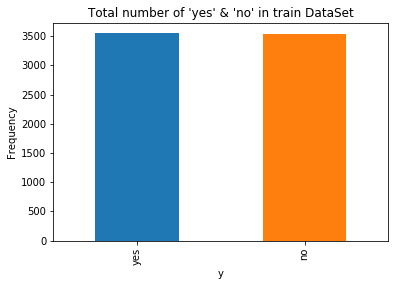

In [37]:
plot = trainY.plot(kind='bar',x='y')
plot.set_xlabel('y')
plot.set_ylabel('Frequency')
plot.set_title("Total number of 'yes' & 'no' in train DataSet")

In [38]:
testY = test.y.value_counts()

In [39]:
testY

no     1749
yes    1742
Name: y, dtype: int64

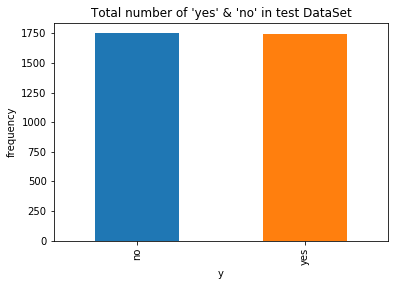

In [40]:
testPlot = testY.plot(kind='bar',x='y')
testPlot.set_xlabel('y')
testPlot.set_ylabel('frequency')
testPlot.set_title("Total number of 'yes' & 'no' in test DataSet");

Text(0.5, 1.0, 'number of ages and their Frequency')

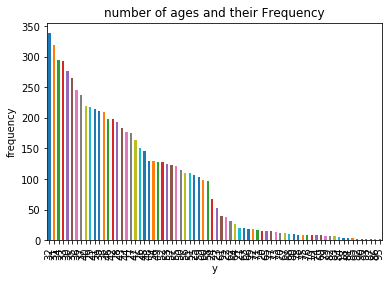

In [41]:
trainAge = train.age.value_counts()
trainAgePlot = trainAge.plot(kind='bar',x='y')
trainAgePlot.set_xlabel('y')
trainAgePlot.set_ylabel('frequency')
trainAgePlot.set_title('number of ages and their Frequency')

# Label Encoding for Train/Test Data

In [43]:
encoded_train = train.copy()
encoded_test = test.copy()

In [45]:
# object of label encode
labelEncoder = LabelEncoder();

In [46]:
encoded_train.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2397,39,technician,married,secondary,no,2266,no,no,cellular,18,feb,208,4,-1,0,unknown,yes
3908,33,admin.,single,tertiary,no,146,no,no,cellular,23,jul,351,3,-1,0,unknown,yes
1378,41,blue-collar,married,primary,no,574,yes,no,unknown,14,may,449,2,-1,0,unknown,no
8976,33,services,single,unknown,no,2297,no,no,cellular,27,jul,527,1,-1,0,unknown,yes
8719,22,blue-collar,single,secondary,no,0,yes,no,unknown,19,may,123,1,-1,0,unknown,no
